<a href="https://colab.research.google.com/github/SangeerthanaBalasubramaniam/Machine-Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df.drop('Outcome',axis = 1)
Y = df.Outcome

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=4)

# Using Sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_regression = LogisticRegression()

In [ ]:
logistic_regression.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_pred = logistic_regression.predict(X_test)

In [ ]:
from sklearn import metrics 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [ ]:
print(cm)

[[110  16]
 [ 23  43]]


In [ ]:
accuracy = metrics.accuracy_score(Y_test, Y_pred)
accuracy_percentage = 100 * accuracy
print('Accuracy(sklearn):', accuracy_percentage)

Accuracy(sklearn): 79.6875


In [ ]:
corr = df.corr()
print(corr)

                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]


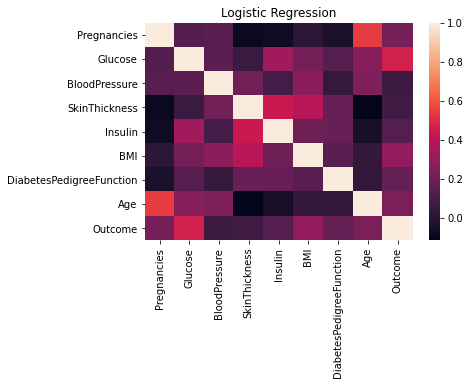

In [ ]:
plt.title('Logistic Regression')
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

# From Scratch

In [ ]:
class LogisticRegression:
  def __init__(self,lr = 0.001,n_iters=10000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self,X,y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_iters):
      linear_model = np.dot(X,self.weights) + self.bias
      y_predicted = self._sigmoid(linear_model)

      dw = (1/n_samples)* np.dot(X.T,(y_predicted-y))
      db = (1/n_samples)* np.sum(y_predicted-y)

      self.weights -= self.lr*dw
      self.bias -= self.lr*db

  def predict(self,X):
    linear_model = np.dot(X,self.weights) + self.bias
    y_predicted = self._sigmoid(linear_model)
    y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
    return y_predicted_cls

  def _sigmoid(self,x):
    return 1/(1+np.exp(-x))


In [ ]:
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

In [ ]:
regressor = LogisticRegression(lr=0.0001, n_iters=10000)
regressor.fit(X_train, Y_train)
predictions = regressor.predict(X_test)
print("Accuracy(scratch):", accuracy(Y_test, predictions)*100)

Accuracy(scratch): 70.83333333333334
